## Plot Gaze Timeline with Kinematic Events (shooting study)

Input:  
* gaze, kinematics, shots

To do:
* export for stats??

In [58]:
## set to full width if not using theme
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import matplotlib.patches as mpatches
import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)

plt.ioff() # Turn interactive plotting off

#url = "https://raw.githubusercontent.com/jamcro/shootGaze/master/data/shootingNoviceGaze.csv"
#gaze_df = pd.read_csv(url, sep=',', skipinitialspace=True)
#url = "https://raw.githubusercontent.com/jamcro/shootGaze/master/data/shootingNoviceKinematics.csv"
#kin_df = pd.read_csv(url, sep=',', skipinitialspace=True)

gaze_df = pd.read_csv('/Users/jc/Documents/GitHub/shootGaze/data/shootingNoviceGaze.csv', sep=',', skipinitialspace=True)
kin_df = pd.read_csv('/Users/jc/Documents/GitHub/shootGaze/data/shootingNoviceKinematics.csv', sep=',', skipinitialspace=True)
shot_df = pd.read_csv('/Users/jc/Documents/GitHub/shootGaze/data/shootingNoviceShots.csv', sep=',', skipinitialspace=True)

In [60]:
# remove trailing nans
first_idx = gaze_df.first_valid_index()
last_idx = gaze_df.last_valid_index()
print(first_idx, last_idx)
gaze_df = gaze_df.loc[first_idx:last_idx]

#gaze_df['fixOn'] = (gaze_df.startTime - gaze_df.Timer)
#gaze_df['fixOff'] = (gaze_df.finishTime - gaze_df.Timer)
#gaze_df['fixLen'] = (gaze_df.fixOff - gaze_df.fixOn)

# put them in order to make table easier to view
gaze_df.insert(7, 'tFixOn', (gaze_df.startTime - gaze_df.Timer))
gaze_df.insert(8, 'tFixOff', (gaze_df.finishTime - gaze_df.Timer))
gaze_df.insert(9, 'fixDur', (gaze_df.tFixOff - gaze_df.tFixOn))
gaze_df['shotFired'] = gaze_df['shotFired'].astype('int64')
gaze_df['fixID'] = pd.Categorical(gaze_df['fixID'], categories=['A','B','C','D'], ordered=True)
gaze_df['fixIDcode'] = gaze_df['fixID'].cat.codes + 1
#gaze_df['fixID'].value_counts()
gaze_df.head(10)

0 877


,Subject,Intervention,Day,Trial,Timer,startTime,finishTime,tFixOn,tFixOff,fixDur,fixID,Position,Distance,shotFired,fixIDcode
0,1,0,1,1,7.05,7.685,8.722,0.635,1.672,1.037,B,2,5,0,2
1,1,0,1,1,7.05,8.790,9.419,1.740,2.369,0.629,A,1,5,0,1
2,1,0,1,1,7.05,9.470,13.006,2.420,5.956,3.536,B,2,5,1,2
3,1,0,1,1,7.05,13.074,15.947,6.024,8.897,2.873,C,3,7,0,3
4,1,0,1,1,7.05,15.981,17.834,8.931,10.784,1.853,D,4,9,0,4
5,1,0,1,1,7.05,17.868,18.769,10.818,11.719,0.901,C,3,7,0,3
6,1,0,1,1,7.05,18.837,20.333,11.787,13.283,1.496,D,4,9,0,4
7,1,0,1,2,3.58,4.331,4.654,0.751,1.074,0.323,B,1,7,0,2
8,1,0,1,2,3.58,4.756,4.943,1.176,1.363,0.187,C,2,5,0,3
9,1,0,1,2,3.58,5.038,6.024,1.458,2.444,0.986,B,1,7,0,2


In [61]:
shot_df['threat1'] = pd.Categorical(shot_df['threat1'], categories=['A','B','C','D'], ordered=True)
shot_df['threat2'] = pd.Categorical(shot_df['threat2'], categories=['A','B','C','D'], ordered=True)
shot_df['targetShot1'] = pd.Categorical(shot_df['targetShot1'], categories=['A','B','C','D'], ordered=True)
shot_df['targetShot2'] = pd.Categorical(shot_df['targetShot2'], categories=['A','B','C','D'], ordered=True)
shot_df['outcomeShot1'] = pd.Categorical(shot_df['outcomeShot1'])
shot_df['outcomeShot2'] = pd.Categorical(shot_df['outcomeShot2'])

In [62]:
# remove trailing nans
first_idx = kin_df.first_valid_index()
last_idx = kin_df.last_valid_index()
print(first_idx, last_idx)
kin_df = kin_df.loc[first_idx:last_idx]

# convert dtypes
kin_df['Subject'] = kin_df['Subject'].astype('int64')
kin_df['Intervention'] = kin_df['Intervention'].astype('int64')
kin_df['Day'] = kin_df['Day'].astype('int64')
kin_df['Trial'] = kin_df['Trial'].astype('int64')

#subtract Timer (start of trial) from all time values
kin_df.loc[:, 'Timer':'tShot2'] = kin_df.loc[:, 'Timer':'tShot2'].sub(kin_df['Timer'], axis=0)
kin_df.head(3)

0 209


,Subject,Intervention,Day,Trial,Timer,tHandGun,tDrawn,tGunReady,tOnTrigger,tShot1,tOffTrigger,tOnTrigger2,tShot2
0,1,0,1,1,0.0,1.739,2.428,3.149,3.428,5.421,11.596,NaN,NaN
1,1,0,1,2,0.0,0.808,1.987,2.710,NaN,NaN,NaN,NaN,NaN
2,1,0,1,3,0.0,0.605,2.320,3.205,3.602,6.324,7.205,NaN,NaN


In [63]:
#kin_df[(kin_df.Subject == 1) & (kin_df.Day == 1) & (kin_df.Trial == 5)]
#gaze_df[(gaze_df.Subject == 1) & (gaze_df.Day == 1) & (gaze_df.Trial == 5)]

In [64]:
# combine data that has one row per trial
events_df = pd.merge(kin_df, shot_df, on=['Subject', 'Intervention', 'Day', 'Trial'])

# combine with gaze data (i.e. repeat trial based data for each fixation)
dat_df = pd.merge(gaze_df,events_df, on=['Subject', 'Intervention', 'Day', 'Trial'])
#dat_df.columns.values
dat_df.head()

,Subject,Intervention,Day,Trial,Timer_x,startTime,finishTime,tFixOn,tFixOff,fixDur,...,tShot1,tOffTrigger,tOnTrigger2,tShot2,threat1,threat2,targetShot1,targetShot2,outcomeShot1,outcomeShot2
0,1,0,1,1,7.05,7.685,8.722,0.635,1.672,1.037,...,5.421,11.596,NaN,NaN,B,NaN,B,NaN,Miss,NaN
1,1,0,1,1,7.05,8.790,9.419,1.740,2.369,0.629,...,5.421,11.596,NaN,NaN,B,NaN,B,NaN,Miss,NaN
2,1,0,1,1,7.05,9.470,13.006,2.420,5.956,3.536,...,5.421,11.596,NaN,NaN,B,NaN,B,NaN,Miss,NaN
3,1,0,1,1,7.05,13.074,15.947,6.024,8.897,2.873,...,5.421,11.596,NaN,NaN,B,NaN,B,NaN,Miss,NaN
4,1,0,1,1,7.05,15.981,17.834,8.931,10.784,1.853,...,5.421,11.596,NaN,NaN,B,NaN,B,NaN,Miss,NaN


### Coding errors   
shotFired not always accurate. So create new var: idGazeShot

In [65]:
dat_df['idGazeShot'] = ((dat_df['tShot1'] < dat_df['tFixOff']) & (dat_df['tShot1'] > dat_df['tFixOn'])) | ((dat_df['tShot2'] < dat_df['tFixOff']) & (dat_df['tShot2'] > dat_df['tFixOn']))

### Find gaze and events when fixation on valid threat and shot fired

In [66]:
onthreat_df = dat_df.loc[((dat_df['fixID']==dat_df['threat1']) | (dat_df['fixID']==dat_df['threat2'])), 
           ['Subject', 'Intervention', 'Day', 'Trial', 
            'idGazeShot','tFixOn','fixID', 'threat1', 'threat2', 
            'fixDur', 'Position','fixIDcode','tOnTrigger', 
            'tShot1', 'tShot2', 'targetShot1', 'targetShot2', 'outcomeShot1', 'outcomeShot2']]
onthreat_df.head(10)

#['Subject', 'Intervention', 'Day', 'Trial', 'shotFired','tFixOn', 'fixID', 'threat1', 'threat2',
#            'tOnTrigger', 'tShot1', 'tShot2', 'targetShot1', 'targetShot2', 'outcomeShot1', 'outcomeShot2']]

fired_df = onthreat_df.loc[(onthreat_df['idGazeShot']==True), 
           ['Subject', 'Intervention', 'Day', 'Trial', 
            'idGazeShot','tFixOn','fixID', 'threat1', 'threat2', 
            'fixDur', 'Position','fixIDcode','tOnTrigger', 
            'tShot1', 'tShot2', 'targetShot1', 'targetShot2', 'outcomeShot1', 'outcomeShot2']]
fired_df.head(10)
#fired_df['tShot1'].dtypes

,Subject,Intervention,Day,Trial,idGazeShot,tFixOn,fixID,threat1,threat2,fixDur,Position,fixIDcode,tOnTrigger,tShot1,tShot2,targetShot1,targetShot2,outcomeShot1,outcomeShot2
2,1,0,1,1,True,2.420,B,B,NaN,3.536,2,2,3.428,5.421,NaN,B,NaN,Miss,NaN
23,1,0,1,3,True,5.366,A,A,NaN,3.519,4,1,3.602,6.324,NaN,A,NaN,Torso,NaN
28,1,0,1,4,True,4.674,B,D,B,1.156,4,2,2.452,5.080,7.726,C,B,Miss,Miss
29,1,0,1,4,True,6.034,D,D,B,3.366,2,4,2.452,5.080,7.726,C,B,Miss,Miss
33,1,0,1,5,True,1.862,C,C,D,2.839,3,3,2.763,4.531,NaN,C,NaN,Torso,NaN
58,1,0,1,8,True,2.333,D,D,NaN,2.550,3,4,2.812,4.480,NaN,D,NaN,Torso,NaN
66,1,0,1,10,True,1.802,C,C,NaN,1.309,3,3,2.331,2.840,NaN,C,NaN,Torso,NaN
69,1,1,2,1,True,2.140,C,C,NaN,0.935,4,3,2.371,3.054,NaN,C,NaN,Torso,NaN
81,1,1,2,4,True,4.234,A,D,A,0.714,2,1,2.670,3.589,4.920,D,A,Torso,Torso
114,2,0,1,1,True,2.038,B,B,NaN,1.598,2,2,3.018,3.552,NaN,B,NaN,Torso,NaN


### define function to plot gaze for each subject

In [67]:
def plotGazeTimeline(df, subj, day, tr, axId):
    # identify this trial
    x = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)].tFixOn
    width = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)].fixDur
    bottom = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)].Position
    height = [0.5] * len(x)

    catColor = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)].fixIDcode
    mycolors = ['#d7191c','#fdae61','#abdda4','#2b83ba']
    colorlist = [mycolors[x] for x in catColor-1]
    
    if axId.ndim == 1:
        axId[tr-1].bar(x, height, width, bottom, align='edge', color=colorlist, label=catColor)
    else:
        axId[tr-1, day-1].bar(x, height, width, bottom, align='edge', color=colorlist, label=catColor)

In [68]:
def plotThreat(df, subj, day, tr, axId):
    # identify this trial
    x = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)].tFixOn
    width = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)].fixDur
    bottom = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)].Position
    height = [0.5] * len(x)
    edgecol = 'k' * len(x)
    if axId.ndim == 1:
        axId[tr-1].bar(x, 0.5, width, bottom, align='edge', color='none', edgecolor = edgecol, lw=1.5)
    else:
        axId[tr-1, day-1].bar(x, height, width, bottom, align='edge', color='none', edgecolor = edgecol, lw=1.5)

In [69]:
def plotKinEvents(df, subj, day, tr, axId):
    # identify this trial
    thisTr = df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)]

    from itertools import cycle
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)

    #labels=df.loc[:,'handGun':'shot2'].columns.tolist()
    if thisTr.size > 0:
        xcoords = thisTr.loc[:,'tHandGun':'tShot2'].values
        for xc in xcoords[0]:
            if axId.ndim == 1:
                axId[tr-1].axvline(x=xc, linestyle=next(linecycler), color='k', lw=1)
                axId[tr-1].grid(b=False)
            else:
                axId[tr-1, day-1].axvline(x=xc, linestyle=next(linecycler), color='k', lw=1)

### plot all trials for each day

In [70]:
# plotGazeTimeline(gaze_df, 1, 1, 2, 1)
width = 8
height = 12
nsubj = gaze_df.Subject.unique().size

for sbj in range(1,nsubj+1):
    for dy in range(1,4):
        fig, ax = plt.subplots(nrows=10, ncols=1, sharex=True, sharey=True, figsize=(width, height))
        figName = '/Users/jc/Documents/GitHub/shootGaze/figs/s' + str(sbj) + 'day' + str(dy) + 'gaze.png'
        for tr in range(1,11):
            plotGazeTimeline(gaze_df, sbj, dy, tr, ax)
            plotThreat(onthreat_df, sbj, dy, tr, ax)
            plotKinEvents(kin_df, sbj, dy, tr, ax)

        ax[0].set_title('Day ' + str(dy))
        ax[9].set_xlabel('Time (s)')

        axc=plt.gca()                            # get the axis
        axc.set_ylim([0.75,4.75])
        axc.set_ylim(axc.get_ylim()[::-1])        # invert the axis
        axc.yaxis.set_ticks([1.25,2.25,3.25,4.25]) # set y-ticks
        axc.yaxis.tick_left()                    # remove right y-Ticks
        labels = ['Far Left','Left','Right','Far Right']    
        axc.set_yticklabels(labels, fontdict=None, minor=False)

        xlims = axc.get_xlim()
        axc.set_xlim([0,xlims[1]])
        
        plt.tick_params(top='off', right='off', labelbottom='on')     # remove all the ticks

        #for spine in plt.gca().spines.values():
         #   spine.set_visible(False)

        patch1 = mpatches.Patch(color='#d7191c', label='A')
        patch2 = mpatches.Patch(color='#fdae61', label='B')
        patch3 = mpatches.Patch(color='#abdda4', label='C')
        patch4 = mpatches.Patch(color='#2b83ba', label='D')

        plt.legend(handles=[patch1,patch2,patch3,patch4],
                   bbox_to_anchor=(0.95, 0.95),
                   loc=1, ncol=4,
                   bbox_transform=plt.gcf().transFigure,
                   fontsize=8,
                   title='Target ID')

        # # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
        #plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
        #plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)

        # Tight layout often produces nice results but requires the title to be spaced accordingly
        fig.tight_layout()
        fig.subplots_adjust(top=0.88)

        plt.savefig(figName)
        #plt.show()
        plt.close(fig)

### Outcome variables
#### dat_df  

Average fixation duration  
Number of fixations  
Number of fixations on same target  

#### fired_df  
Number of hits by body location  
Time to ID target from trial onset (tOnTrigger)  
Time to ID target after fixation (tFixOn - tOnTrigger)  
Time to shoot after fixation (tFixOn - tOnTrigger)  
Time to shoot (tOnTrigger - tShot)  

### Predictor variables  
Trial  
Day  
Group  
Group*Day  

In [71]:
fired_df['tShot1-tFixOn'] = fired_df['tShot1'] - fired_df['tFixOn']
fired_df.loc[fired_df['tShot1-tFixOn']<0,'tShot1-tFixOn'] = np.nan
fired_df['tShot2-tFixOn'] = fired_df['tShot2'] - fired_df['tFixOn']
mask = fired_df['tShot1-tFixOn'].isnull()
fired_df['tShot2-tFixOn'] = fired_df[mask]['tShot2-tFixOn']

fired_df['tFixOn-tOnTrigger'] = fired_df['tOnTrigger'] - fired_df['tFixOn']
fired_df.loc[fired_df['tFixOn-tOnTrigger']<0,'tFixOn-tOnTrigger'] = np.nan #ignore trials where finger on trigger before fixation - mostly shot2

fired_df.head(10)

,Subject,Intervention,Day,Trial,idGazeShot,tFixOn,fixID,threat1,threat2,fixDur,...,tOnTrigger,tShot1,tShot2,targetShot1,targetShot2,outcomeShot1,outcomeShot2,tShot1-tFixOn,tShot2-tFixOn,tFixOn-tOnTrigger
2,1,0,1,1,True,2.420,B,B,NaN,3.536,...,3.428,5.421,NaN,B,NaN,Miss,NaN,3.001,NaN,1.008
23,1,0,1,3,True,5.366,A,A,NaN,3.519,...,3.602,6.324,NaN,A,NaN,Torso,NaN,0.958,NaN,NaN
28,1,0,1,4,True,4.674,B,D,B,1.156,...,2.452,5.080,7.726,C,B,Miss,Miss,0.406,NaN,NaN
29,1,0,1,4,True,6.034,D,D,B,3.366,...,2.452,5.080,7.726,C,B,Miss,Miss,NaN,1.692,NaN
33,1,0,1,5,True,1.862,C,C,D,2.839,...,2.763,4.531,NaN,C,NaN,Torso,NaN,2.669,NaN,0.901
58,1,0,1,8,True,2.333,D,D,NaN,2.550,...,2.812,4.480,NaN,D,NaN,Torso,NaN,2.147,NaN,0.479
66,1,0,1,10,True,1.802,C,C,NaN,1.309,...,2.331,2.840,NaN,C,NaN,Torso,NaN,1.038,NaN,0.529
69,1,1,2,1,True,2.140,C,C,NaN,0.935,...,2.371,3.054,NaN,C,NaN,Torso,NaN,0.914,NaN,0.231
81,1,1,2,4,True,4.234,A,D,A,0.714,...,2.670,3.589,4.920,D,A,Torso,Torso,NaN,0.686,NaN
114,2,0,1,1,True,2.038,B,B,NaN,1.598,...,3.018,3.552,NaN,B,NaN,Torso,NaN,1.514,NaN,0.980


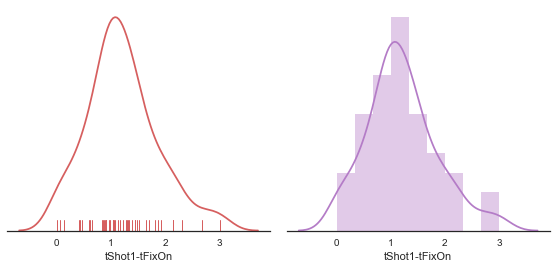

In [54]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)
sns.distplot(fired_df['tShot1-tFixOn'].dropna(axis=0), hist=False, rug=True, color="r", ax=axes[0])
sns.distplot(fired_df['tShot1-tFixOn'].dropna(axis=0), color="m", ax=axes[1])

sns.despine(left=True)
sns.set_context("talk")
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

# vertical 'bar' plot with data and median by group

In [53]:
df = onthreat_df
df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)]

NameError: name 'subj' is not defined

In [ ]:
df = gaze_df
df.loc[(df.Subject == subj) & (df.Day == day) & (df.Trial == tr)]